In [127]:
#データの読み込み
import pandas as pd
customer_master = pd.read_csv('/Users/shimizushota/python/100knock-data_analytics/1章/customer_master.csv')
print(customer_master.head())

item_master = pd.read_csv('/Users/shimizushota/python/100knock-data_analytics/1章/item_master.csv')
print(item_master.head())

transaction_1 = pd.read_csv('/Users/shimizushota/python/100knock-data_analytics/1章/transaction_1.csv') 
print(transaction_1.head())
transaction_2 = pd.read_csv('/Users/shimizushota/python/100knock-data_analytics/1章/transaction_2.csv')
transaction_2.head()

transaction_detail_1 = pd.read_csv('/Users/shimizushota/python/100knock-data_analytics/1章/transaction_detail_1.csv')
print(transaction_detail_1.head())
transaction_detail_2 = pd.read_csv('/Users/shimizushota/python/100knock-data_analytics/1章/transaction_detail_2.csv')
transaction_detail_2.head()

  customer_id customer_name    registration_date customer_name_kana  \
0    IK152942        平田 裕次郎  2019-01-01 00:25:33          ひらた ゆうじろう   
1    TS808488         田村 詩織  2019-01-01 01:13:45            たむら しおり   
2    AS834628         久野 由樹  2019-01-01 02:00:14             ひさの ゆき   
3    AS345469          鶴岡 薫  2019-01-01 04:48:22           つるおか かおる   
4    GD892565         大内 高史  2019-01-01 04:54:51           おおうち たかし   

                         email gender  age      birth pref  
0  hirata_yuujirou@example.com      M   29  1990/6/10  石川県  
1    tamura_shiori@example.com      F   33  1986/5/20  東京都  
2      hisano_yuki@example.com      F   63   1956/1/2  茨城県  
3   tsuruoka_kaoru@example.com      M   74  1945/3/25  東京都  
4   oouchi_takashi@example.com      M   54   1965/8/5  千葉県  
  item_id item_name  item_price
0    S001      PC-A       50000
1    S002      PC-B       85000
2    S003      PC-C      120000
3    S004      PC-D      180000
4    S005      PC-E      210000
  transaction_i

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


In [129]:
#データを結合（ユニオン）
# ignore_indexを使用しないと，出力されるデータフレームのインデックスが連番にならない
transaction = pd.concat([transaction_1, transaction_2], ignore_index = True)
print(transaction.head())
print(len(transaction))
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index = True)
print(transaction_detail.head())
print(len(transaction_detail))

  transaction_id   price         payment_date customer_id
0    T0000000113  210000  2019-02-01 01:36:57    PL563502
1    T0000000114   50000  2019-02-01 01:37:23    HD678019
2    T0000000115  120000  2019-02-01 02:34:19    HD298120
3    T0000000116  210000  2019-02-01 02:47:23    IK452215
4    T0000000117  170000  2019-02-01 04:33:46    PL542865
6786
   detail_id transaction_id item_id  quantity
0          0    T0000000113    S005         1
1          1    T0000000114    S001         1
2          2    T0000000115    S003         1
3          3    T0000000116    S005         1
4          4    T0000000117    S002         2
7144


In [131]:
#売り上げデータを結合（ジョイン）
join_data = pd.merge(transaction_detail, transaction[["transaction_id", "payment_date", "customer_id"]], on = "transaction_id", how = "left" )
print(join_data.head())

#マスターデータを結合（ジョイン）
join_data = pd.merge(join_data, customer_master, on = 'customer_id', how = 'left')
join_data = pd.merge(join_data, item_master, on = 'item_id', how = 'left')
join_data.head()

   detail_id transaction_id item_id  quantity         payment_date customer_id
0          0    T0000000113    S005         1  2019-02-01 01:36:57    PL563502
1          1    T0000000114    S001         1  2019-02-01 01:37:23    HD678019
2          2    T0000000115    S003         1  2019-02-01 02:34:19    HD298120
3          3    T0000000116    S005         1  2019-02-01 02:47:23    IK452215
4          4    T0000000117    S002         2  2019-02-01 04:33:46    PL542865


,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


In [133]:
#必要なデータ列を作る
join_data['price'] = join_data['quantity'] * join_data['item_price']
join_data[['quantity', 'item_price', 'price']].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


In [135]:
#データ検算
print(sum(join_data['price']))
print(sum(transaction['price']))

sum(join_data['price']) == sum(transaction['price'])

971135000
971135000


True

In [137]:
#各種統計量を把握する
print(join_data.isnull().sum()) #isnull true/falseを返す　
print(join_data.describe())
print('payment_date_min =',join_data['payment_date'].min())
print('payment_date_max =',join_data['payment_date'].max())

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
price                 0
dtype: int64
         detail_id     quantity          age     item_price          price
count  7144.000000  7144.000000  7144.000000    7144.000000    7144.000000
mean   3571.500000     1.199888    50.265677  121698.628219  135937.150056
std    2062.439494     0.513647    17.190314   64571.311830   68511.453297
min       0.000000     1.000000    20.000000   50000.000000   50000.000000
25%    1785.750000     1.000000    36.000000   50000.000000   85000.000000
50%    3571.500000     1.000000    50.000000  102500.000000  120000.000000
75%    5357.250000     1.000000    65.000000  187500.0

In [ ]:
#月別でデータを集計
print(join_data.dtypes) #最初にデータタイプを確認する

join_data['payment_date'] = pd.to_datetime(join_data['payment_date']) #datatypeをobjectからdatatime型に変換した

join_data['payment_month'] = join_data['payment_date'].dt.strftime('%Y%m') #datetime型を「年＋月」の文字列に変換する
join_data['payment_date'] = join_data['payment_date'].astype(str)
join_data[['payment_date', 'payment_month']].head()
join_data.groupby('payment_month').sum()['price']

print(join_data.groupby(['payment_month', 'item_name']).sum()[['price', 'quantity']])

print(pd.pivot_table(join_data, index = 'item_name', columns = 'payment_month', values = ['price', 'quantity'], aggfunc = 'sum'))

In [182]:
#商品別の売上推移を可視化する
graph_data = pd.pivot_table(join_data, index = 'payment_month', columns = 'item_name', values = 'price', aggfunc = 'sum')
print(graph_data.head())

item_name          PC-A      PC-B      PC-C      PC-D      PC-E
payment_month                                                  
201902         24150000  25245000  19800000  31140000  59850000
201903         26000000  25500000  19080000  25740000  64050000
201904         25900000  23460000  21960000  24300000  64890000
201905         24850000  25330000  20520000  25920000  58800000
201906         26000000  23970000  21840000  28800000  63420000


pandas.core.frame.DataFrame

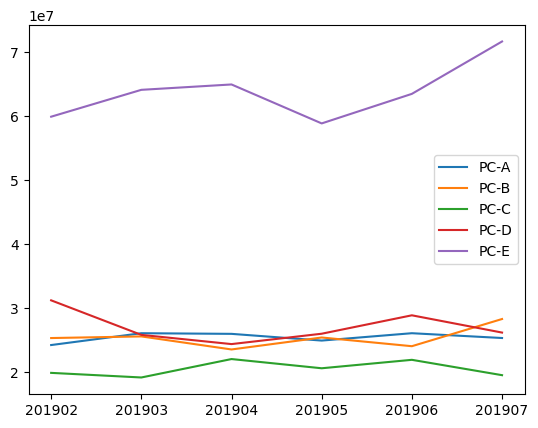

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(graph_data.index), graph_data['PC-A'], label = 'PC-A') #list(graph_data.index)ではなく、graph_data.indexでも可能
plt.plot(list(graph_data.index), graph_data['PC-B'], label = 'PC-B')
plt.plot(list(graph_data.index), graph_data['PC-C'], label = 'PC-C')
plt.plot(list(graph_data.index), graph_data['PC-D'], label = 'PC-D')
plt.plot(list(graph_data.index), graph_data['PC-E'], label = 'PC-E')
plt.legend()
plt.show()

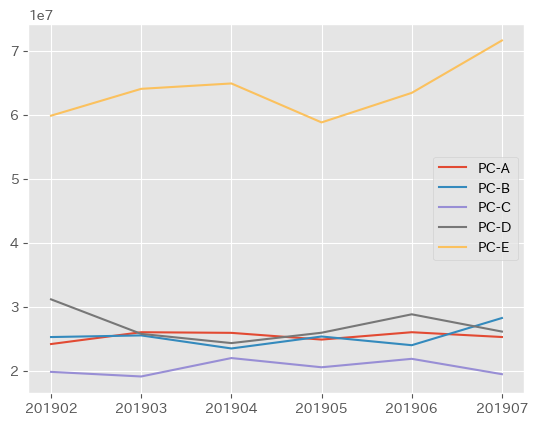

In [178]:
import matplotlib.style
matplotlib.style.use('ggplot')
import japanize_matplotlib 

fig, ax = plt.subplots()
ax.plot(list(graph_data.index), graph_data['PC-A'], label = 'PC-A')
ax.plot(list(graph_data.index), graph_data['PC-B'], label = 'PC-B')
ax.plot(list(graph_data.index), graph_data['PC-C'], label = 'PC-C')
ax.plot(list(graph_data.index), graph_data['PC-D'], label = 'PC-D')
ax.plot(list(graph_data.index), graph_data['PC-E'], label = 'PC-E')
plt.legend()
plt.show()